# Загальні вимоги:  
▪ Визначення функції приналежності.  
▪ Сформулюйте правила.  
▪ Отримання нечіткого рішення (для різних вхідних параметрів)  
▪ Для виконання завдання можливо використовувати стороні бібліотеки  

# Варіант 1: Вирішіть проблему контролера кондиціонера. Прикладом вхідних параметрів можуть бути “Температура”, “Вологість” та інше. Вихід: “Швидкість компресора”, “режим роботи”.

In [182]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Визначення функції приналежності

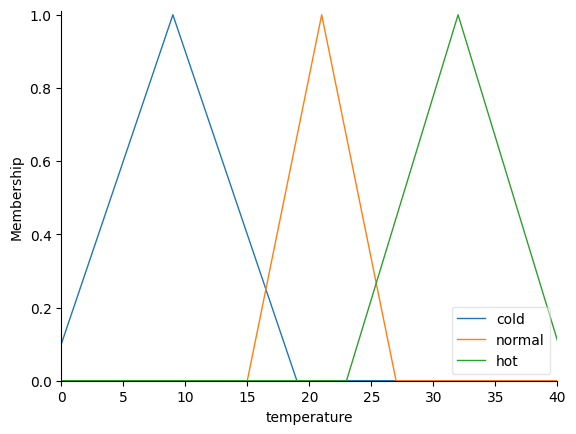

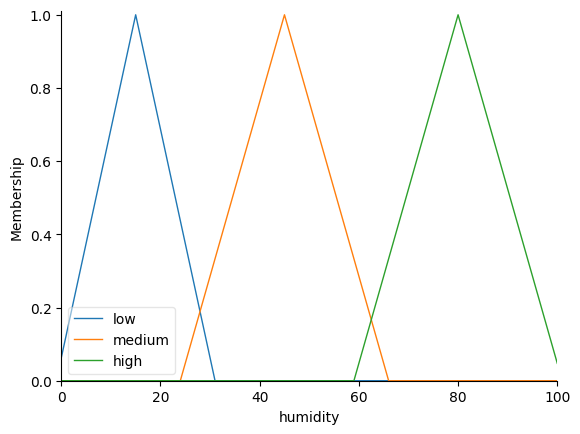

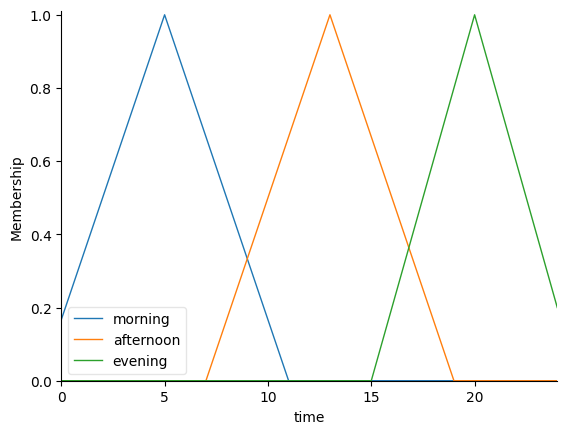

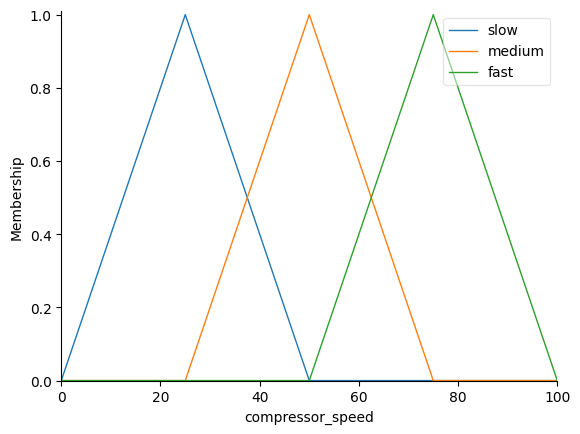

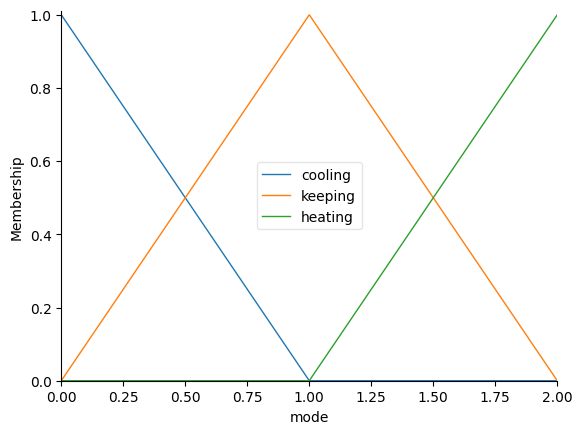

In [ ]:
temp_min, temp_max = 0, 40
hum_min, hum_max = 0, 100
time_min, time_max = 0, 24

temperature = ctrl.Antecedent(np.arange(temp_min, temp_max + 1, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(hum_min, hum_max + 1, 1), 'humidity')
time = ctrl.Antecedent(np.arange(time_min, time_max + 1, 1), 'time')

#
compressor_speed = ctrl.Consequent(np.arange(0, 101, 1), 'compressor_speed')
mode = ctrl.Consequent(np.arange(0, 3, 1), 'mode')

#
cold_l, cold_h = temp_min, 18
cold_m = (cold_h + cold_l)//2

normal_l, normal_h = 16, 26
normal_m = (normal_h + normal_l)//2

hot_l, hot_h = 24, temp_max
hot_m = (hot_h + hot_l)//2

temperature['cold'] = fuzz.trimf(temperature.universe, list((cold_l - 1, cold_m, cold_h + 1)))
temperature['normal'] = fuzz.trimf(temperature.universe, list((normal_l - 1, normal_m, normal_h + 1)))
temperature['hot'] = fuzz.trimf(temperature.universe, list((hot_l - 1, hot_m, hot_h + 1)))
temperature.view()

#
low_l, low_h = hum_min, 30
low_m = (low_h + low_l)//2

medium_l, medium_h = 25, 65
medium_m = (medium_h + medium_l)//2

high_l, high_h = 60, hum_max
high_m = (high_h + high_l)//2

humidity['low'] = fuzz.trimf(humidity.universe, list((low_l - 1, low_m, low_h + 1)))
humidity['medium'] = fuzz.trimf(humidity.universe, list((medium_l - 1, medium_m, medium_h + 1)))
humidity['high'] = fuzz.trimf(humidity.universe, list((high_l - 1, high_m, high_h + 1)))
humidity.view()

#
morning_l, morning_h = time_min, 10
morning_m = (morning_h + morning_l)//2

afternoon_l, afternoon_h = 8, 18
afternoon_m = (afternoon_h + afternoon_l)//2

evening_l, evening_h = 16, time_max
evening_m = (evening_h + evening_l)//2

time['morning'] = fuzz.trimf(time.universe, list((morning_l - 1, morning_m, morning_h + 1)))
time['afternoon'] = fuzz.trimf(time.universe, list((afternoon_l - 1, afternoon_m, afternoon_h + 1)))
time['evening'] = fuzz.trimf(time.universe, list((evening_l - 1, evening_m, evening_h + 1)))
time.view()

#
compressor_speed['slow'] = fuzz.trimf(compressor_speed.universe, [0, 25, 50])
compressor_speed['medium'] = fuzz.trimf(compressor_speed.universe, [25, 50, 75])
compressor_speed['fast'] = fuzz.trimf(compressor_speed.universe, [50, 75, 100])
compressor_speed.view()

#
mode.automf(names=['cooling', 'keeping', 'heating'])
mode.view()


## Сформулюйте правила

In [210]:
rules = []

rules_string = [
    ['cold', 'low', "morning", "slow", 'heating'],
    ['cold', 'medium', "morning", "slow", 'heating'], #
    ['cold', 'high', "morning", "medium", 'heating'], #
    ['normal', 'low', "morning", 'slow', 'keeping'],  # NOT SURE
    ['normal', 'medium', "morning", 'medium', 'keeping'],  # NOT SURE
    ['normal', 'high', "morning", 'fast', 'keeping'],  # NOT SURE
    ['hot', 'low', "morning", "medium", 'cooling'], #
    ['hot', 'medium', "morning", "medium", 'cooling'],
    ['hot', 'high', "morning", "fast", 'cooling'],
    
    ['cold', 'low', "afternoon", "slow", 'heating'],
    ['cold', 'medium', "afternoon", "medium", 'heating'],
    ['cold', 'high', "afternoon", "fast", 'heating'],
    ['normal', 'low', "afternoon", 'slow', 'keeping'],  # NOT SURE
    ['normal', 'medium', "afternoon", 'medium', 'keeping'],  # NOT SURE
    ['normal', 'high', "afternoon", 'fast', 'keeping'],  # NOT SURE
    ['hot', 'low', "afternoon", "slow", 'cooling'],
    ['hot', 'medium', "afternoon", "medium", 'cooling'],
    ['hot', 'high', "afternoon", "fast", 'cooling'],
    
    ['cold', 'low', "evening", "medium", 'heating'], #
    ['cold', 'medium', "evening", "medium", 'heating'],
    ['cold', 'high', "evening", "fast", 'heating'],
    ['normal', 'low', "evening", 'slow', 'keeping'],  # NOT SURE
    ['normal', 'medium', "evening", 'medium', 'keeping'],  # NOT SURE
    ['normal', 'high', "evening", 'fast', 'keeping'],  # NOT SURE
    ['hot', 'low', "evening", "slow", 'cooling'],
    ['hot', 'medium', "evening", "slow", 'cooling'], #
    ['hot', 'high', "evening", "medium", 'cooling'] #
]

for temp, hum, tim, speed, mod in rules_string:
    print(f"Якщо температура {temp}, вологість {hum} та час {tim}, то тоді швидкість компресора {speed} та режим роботи {mod}")
    rules.append(ctrl.Rule(temperature[temp] & humidity[hum] & time[tim], [compressor_speed[speed], mode[mod]]))

Якщо температура cold, вологість low та час morning, то тоді швидкість компресора slow та режим роботи heating
Якщо температура cold, вологість medium та час morning, то тоді швидкість компресора slow та режим роботи heating
Якщо температура cold, вологість high та час morning, то тоді швидкість компресора medium та режим роботи heating
Якщо температура normal, вологість low та час morning, то тоді швидкість компресора slow та режим роботи keeping
Якщо температура normal, вологість medium та час morning, то тоді швидкість компресора medium та режим роботи keeping
Якщо температура normal, вологість high та час morning, то тоді швидкість компресора fast та режим роботи keeping
Якщо температура hot, вологість low та час morning, то тоді швидкість компресора medium та режим роботи cooling
Якщо температура hot, вологість medium та час morning, то тоді швидкість компресора medium та режим роботи cooling
Якщо температура hot, вологість high та час morning, то тоді швидкість компресора fast та

## Отримання нечіткого рішення (для різних вхідних параметрів)

In [ ]:
inputs = [[1, 1, 1], [38, 98, 22], [0, 0, 0], [39, 99, 23], [40, 100, 24], [27.92, 50.54, 17.25]]
for temp, hum, tim in inputs:
    control_system = ctrl.ControlSystem(rules)
    simulator = ctrl.ControlSystemSimulation(control_system)

    simulator.inputs({'temperature': temp, 'humidity': hum, 'time': tim})

    simulator.compute()

    try:
        print(f"На вхід прийшло: {simulator._get_inputs()}")
        print(f"Швидкість компресора: {simulator.output['compressor_speed']} ≈ {list(compressor_speed.terms.keys())[int(simulator.output['compressor_speed'] // (1/3 * 100))]}")
        print(f"Режим роботи: {simulator.output['mode']} ≈ {list(mode.terms.keys())[round(simulator.output['mode'])]}")
    except Exception as e:
        print("[PI]", {'temperature': temp, 'humidity': hum, 'time': tim})
        print("[I]", simulator._get_inputs())
        print("[O]", simulator.output)
        print("[!]", e.__class__.__name__, e)
    print()

На вхід прийшло: OrderedDict({'temperature': 1, 'humidity': 1, 'time': 1})
Швидкість компресора: 25.000000000000007 ≈ slow
Режим роботи: 1.5305555555555554 ≈ heating

На вхід прийшло: OrderedDict({'temperature': 38, 'humidity': 98, 'time': 22})
Швидкість компресора: 49.99999999999997 ≈ medium
Режим роботи: 0.4652014652014651 ≈ cooling

На вхід прийшло: OrderedDict({'temperature': 0, 'humidity': 0, 'time': 0})
Швидкість компресора: 25.0 ≈ slow
Режим роботи: 1.5154569892473118 ≈ heating

На вхід прийшло: OrderedDict({'temperature': 39, 'humidity': 99, 'time': 23})
Швидкість компресора: 49.99999999999999 ≈ medium
Режим роботи: 0.4765873015873016 ≈ cooling

На вхід прийшло: OrderedDict({'temperature': 40, 'humidity': 100, 'time': 24})
Швидкість компресора: 49.99999999999998 ≈ medium
Режим роботи: 0.4881920247773906 ≈ cooling

На вхід прийшло: OrderedDict({'temperature': 27.92, 'humidity': 50.54, 'time': 17.25})
Швидкість компресора: 34.983540750546965 ≈ medium
Режим роботи: 0.3983870967741